FACEMASK DETECTION SYSTEM
CREATED BY:-

SHOBHIT JAIN
E23CSEU2197
SHUBHANG SINGH
E23CSEU2210
YUVRAJ PASSAI
E23CSEU2214

ALL BATCH 74, GROUP 19

NOTE: THE FOLLOWING CODING IS DONE ON MY COMPUTER ACCORDING TO MY CONFIGURATIONS LIKE FILE DESTINATIONS, DISK ALLOCATIONS ETC; SO, IT WILL NOT RUN ON YOUR SYSTEM.
TO MAKE IT WORK JUST REPLACE THE FILE DESTINATION(DATA SET PATH) AND THEN IT WILL WORK.

IMPORTING THE LIBRARIES


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mimg 
import tensorflow as tf
from tensorflow import keras
import cv2 
import PIL
from PIL import Image 

from sklearn.model_selection import train_test_split
import os

In [2]:
with_mask_file=os.listdir('C:\FaceMask\dataset\with_mask')
without_mask_file=os.listdir('C:\FaceMask\dataset\without_mask')

In [3]:
# Num of images in each file
print('Num of images with mask= ',len(with_mask_file))
print('Num of images without mask= ',len(without_mask_file))

Num of images with mask=  3725
Num of images without mask=  3828


In [4]:
with_mask_label=[1]*len(with_mask_file)
without_mask_label=[0]*len(without_mask_file)

In [5]:
with_mask_label[0:5]

[1, 1, 1, 1, 1]

In [6]:
without_mask_label[0:5]

[0, 0, 0, 0, 0]

In [7]:
labels=with_mask_label+without_mask_label
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Visualization Of Data

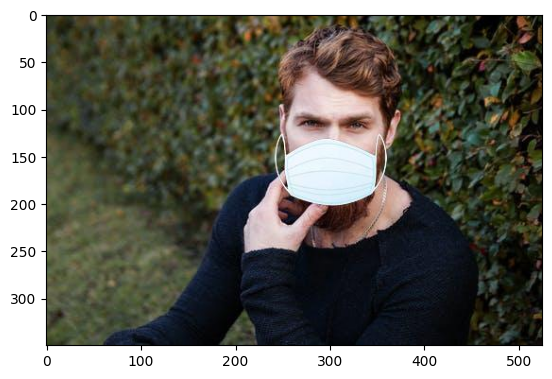

In [8]:
img=mimg.imread('C:\FaceMask\dataset\with_mask\with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

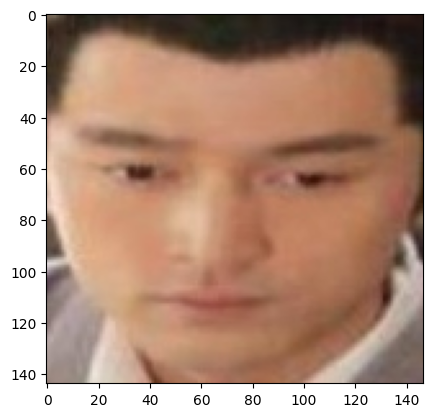

In [9]:
img=mimg.imread('C:\FaceMask\dataset\without_mask\without_mask_1024.jpg')
imgplot=plt.imshow(img)
plt.show()

Image Processing

In [18]:
import os
from PIL import Image
import numpy as np

# New paths for the datasets
with_mask_path = r'C:\FaceMask\dataset\with_mask'
without_mask_path = r'C:\FaceMask\dataset\without_mask'

# Initialize data as a list (not converting to numpy array immediately)
data = []
labels = []

# Processing "with_mask" images
with_mask_files = os.listdir(with_mask_path)
for img_file in with_mask_files:
    img_path = os.path.join(with_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)  # Convert to NumPy array for consistency in data type
    
    data.append(image)       # Keeping data as a list of NumPy arrays
    labels.append(1)         # Label 1 indicates 'with mask'

# Processing "without_mask" images
without_mask_files = os.listdir(without_mask_path)
for img_file in without_mask_files:
    img_path = os.path.join(without_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)  # Convert to NumPy array for consistency in data type
    
    data.append(image)       # Keeping data as a list of NumPy arrays
    labels.append(0)         # Label 0 indicates 'without mask'

# Convert labels to numpy array, but keep data as list
labels = np.array(labels)

# Print the data type and count
print(f"Type of data: {type(data)}")  # Should print <class 'list'>
print(f"Loaded {len(data)} total images.")
print(f"With mask: {sum(labels == 1)}, Without mask: {sum(labels == 0)}")



Type of data: <class 'list'>
Loaded 7553 total images.
With mask: 3725, Without mask: 3828


In [19]:
len(data)

7553

In [20]:
type(data)

list

In [21]:
data[0].shape

(128, 128, 3)

Splitting and Training The Data

In [23]:
import os
from PIL import Image
import numpy as np

# Path for both datasets
with_mask_path = r'C:\FaceMask\dataset\with_mask'
without_mask_path = r'C:\FaceMask\dataset\without_mask'

data_with_mask = []
data_without_mask = []
labels_with_mask = []  # Labels for with_mask (all 1s)
labels_without_mask = []  # Labels for without_mask (all 0s)

# Loading and processing "with_mask" images
for img_file in os.listdir(with_mask_path):
    img_path = os.path.join(with_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    data_with_mask.append(np.array(image))
    labels_with_mask.append(1)  # Label for with_mask

# Loading and processing "without_mask" images
for img_file in os.listdir(without_mask_path):
    img_path = os.path.join(without_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    data_without_mask.append(np.array(image))
    labels_without_mask.append(0)  # Label for without_mask

# Combine both data sets and labels
X = np.array(data_with_mask + data_without_mask)
Y = np.array(labels_with_mask + labels_without_mask)

# Check if the lengths of X and Y match
assert len(X) == len(Y), f"Length mismatch: X has {len(X)} images and Y has {len(Y)} labels."

# Proceed with the train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Print shapes of the train and test sets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (6797, 128, 128, 3)
Test data shape: (756, 128, 128, 3)


In [24]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (6797, 128, 128, 3)
x_test shape: (756, 128, 128, 3)
y_train shape: (6797,)
y_test shape: (756,)


In [25]:
#normalization
x_train = x_train / 255.0
x_test = x_test / 255.0


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Add convolutional layers with ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layer with dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification: with mask or without mask)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)


C:\Users\User\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.7810 - loss: 0.4477 - val_accuracy: 0.9101 - val_loss: 0.2047
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9088 - loss: 0.2262 - val_accuracy: 0.9325 - val_loss: 0.1770
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9302 - loss: 0.1723 - val_accuracy: 0.9418 - val_loss: 0.1428
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9453 - loss: 0.1366 - val_accuracy: 0.9603 - val_loss: 0.1411
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9543 - loss: 0.1336 - val_accuracy: 0.9630 - val_loss: 0.1171
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9675 - loss: 0.0877 - val_accuracy: 0.9550 - val_loss: 0.1264
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9752 - loss: 0.0638 - val_accuracy: 0.9497 - val_loss: 0.1264
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9846 - loss: 0.0509 - 

MODEL EVALUATION AND ACCURACY TESTS.......................

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Precision = 0.96
Recall = 0.98
F1-score = 0.97


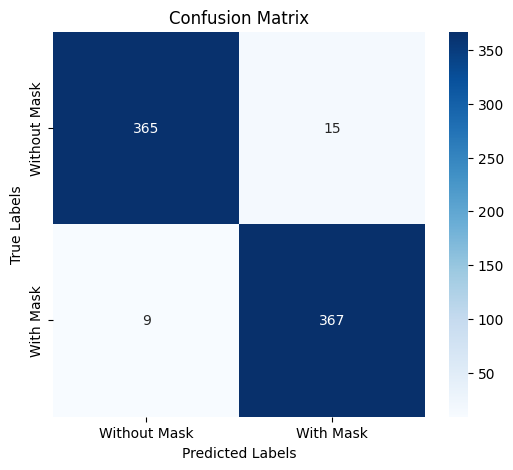

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(x_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred > 0.5).astype("int32")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print('Precision = {:.2f}'.format(precision))
print('Recall = {:.2f}'.format(recall))
print('F1-score = {:.2f}'.format(f1))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Without Mask", "With Mask"], yticklabels=["Without Mask", "With Mask"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [29]:
loss, acc = model.evaluate(x_test, y_test)
print('The Accuracy = ', int(acc * 100), '%')


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9704 - loss: 0.1349
The Accuracy =  96 %


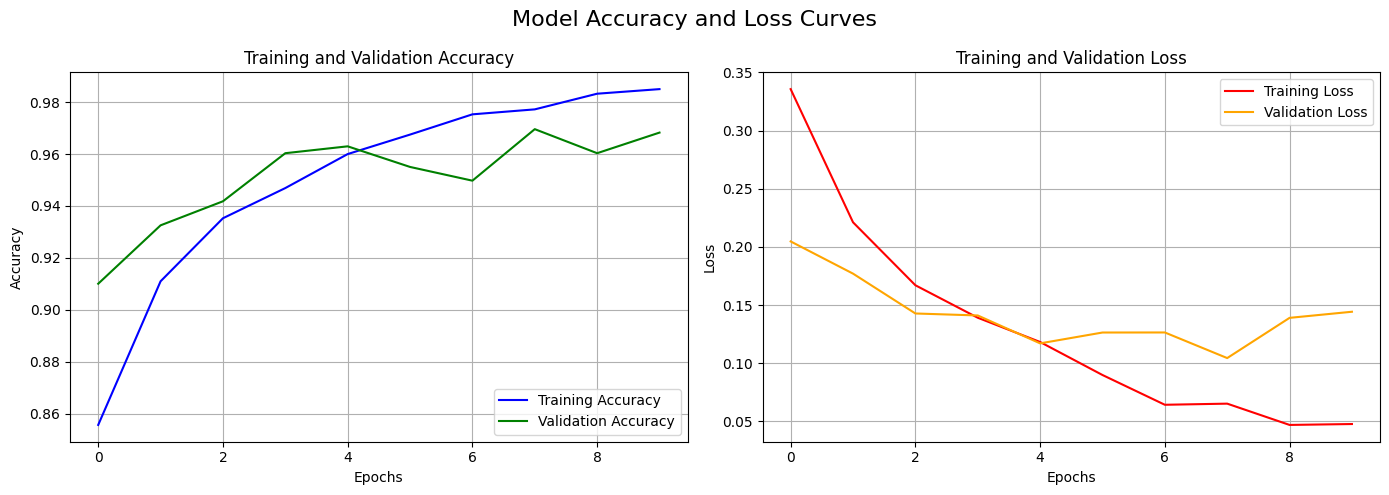

In [30]:
import matplotlib.pyplot as plt

# Assuming history is the result of model.fit(), which contains the training history
# For example:
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plotting the Accuracy and Loss curves in a single figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='b')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.grid(True)

# Plot Loss
ax2.plot(history.history['loss'], label='Training Loss', color='r')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid(True)

# Add title for the entire figure
fig.suptitle('Model Accuracy and Loss Curves', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


SAVING THE MODEL...............................................

In [31]:
import os

# Ensure the directory exists
save_path = r'C:\FaceMask\model'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Full path where the model will be saved
model_name = 'nipun.keras'
model_save_path = os.path.join(save_path, model_name)

# Save the model in Keras format
model.save(model_save_path)

print(f"Model saved successfully at: {model_save_path}")


Model saved successfully at: C:\FaceMask\model\nipun.keras


FINAL IMAGE PREDICTIONS........................................

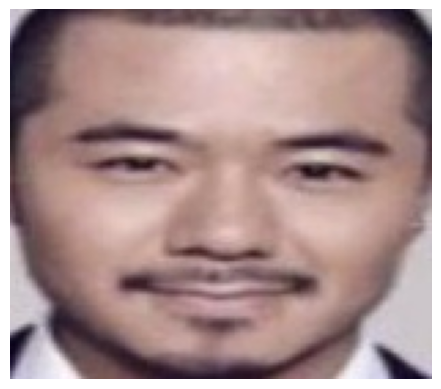

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The person in the image is not wearing a mask


In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model_path = r"C:\FaceMask\model\nipun.keras"
model = load_model(model_path)

# Function for making predictions and showing the image
def predict_image():
    # Ask user for image path
    input_image_path = input("Enter the image path: ")

    try:
        # Open the image using PIL
        img = Image.open(input_image_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axis for better visibility
        plt.show()

        # Preprocess the image for model prediction
        img = img.resize((128, 128))
        img = img.convert('RGB')
        img = np.array(img)
        img = img / 255.0  # Normalize pixel values
        img = np.reshape(img, (1, 128, 128, 3))

        # Make prediction using the loaded model
        prediction = model.predict(img)

        # Get the predicted label (1 if wearing mask, 0 if not)
        predicted_label = np.round(prediction[0][0])  # Rounding the output for binary classification

        # Print the result
        if predicted_label == 1:
            print("The person in the image is wearing a mask")
        else:
            print("The person in the image is not wearing a mask")

    except FileNotFoundError:
        print("File not found. Please check the image path and try again.")

# Run the prediction function
predict_image()





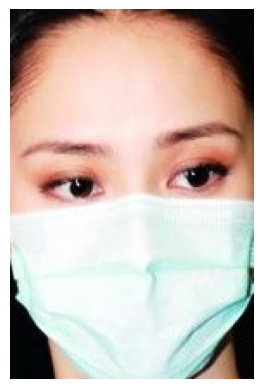

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The person in the image is wearing a mask


In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model_path = r"C:\FaceMask\model\nipun.keras"
model = load_model(model_path)

# Function for making predictions and showing the image
def predict_image():
    # Ask user for image path
    input_image_path = input("Enter the image path: ")

    try:
        # Open the image using PIL
        img = Image.open(input_image_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axis for better visibility
        plt.show()

        # Preprocess the image for model prediction
        img = img.resize((128, 128))
        img = img.convert('RGB')
        img = np.array(img)
        img = img / 255.0  # Normalize pixel values
        img = np.reshape(img, (1, 128, 128, 3))

        # Make prediction using the loaded model
        prediction = model.predict(img)

        # Get the predicted label (1 if wearing mask, 0 if not)
        predicted_label = np.round(prediction[0][0])  # Rounding the output for binary classification

        # Print the result
        if predicted_label == 1:
            print("The person in the image is wearing a mask")
        else:
            print("The person in the image is not wearing a mask")

    except FileNotFoundError:
        print("File not found. Please check the image path and try again.")

# Run the prediction function
predict_image()

THE PROGRAM WILL ASK USER TO INPUT THE IMAGE OF A PERSON AND ON THE BASIS OF ITS TRAINING IT WILL IDENTIFY WHETHER ITS WEARING A MASK OR NOT

WEBCAM OR REAL TIME IDENTIFICATION.................................

In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model_path = r"C:\FaceMask\model\nipun.keras"
model = load_model(model_path)

# Preprocess the image
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Expand dimensions for the model
    return img

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

# Counter to prevent infinite loop during testing
frame_counter = 0
max_frames = 500  # Set this limit to stop after a certain number of frames for debugging

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame.")
        break
    
    # Predict using the model
    try:
        processed_frame = preprocess_image(frame)
        prediction = model.predict(processed_frame, verbose=0)
        
        # Determine label and confidence
        label = "Mask" if prediction[0][0] > 0.5 else "No Mask"
        confidence = round(prediction[0][0] * 100, 2)
        print(f"Prediction: {label} ({confidence}%)")
        
        # Add text to the video stream
        cv2.putText(frame, f"{label} ({confidence}%)", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Display the frame with prediction
        cv2.imshow("Webcam - Press 'q' to Quit", frame)

    except KeyboardInterrupt:
        print("Process interrupted by user.")
        break
    
    # Check for 'q' key to quit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        print("Exiting...")
        break
    
    # Optional: Stop after a certain number of frames for debugging
    frame_counter += 1
    if frame_counter > max_frames:
        print("Reached maximum frame limit. Exiting...")
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


Prediction: Mask (83.3499984741211%)
Prediction: Mask (90.30000305175781%)
Prediction: No Mask (14.029999732971191%)
Prediction: No Mask (47.20000076293945%)
Prediction: No Mask (47.20000076293945%)
Prediction: No Mask (39.83000183105469%)
Prediction: No Mask (25.850000381469727%)
Prediction: No Mask (11.819999694824219%)
Prediction: No Mask (11.819999694824219%)
Prediction: No Mask (44.4900016784668%)
Prediction: No Mask (26.1299991607666%)
Prediction: No Mask (26.1299991607666%)
Prediction: No Mask (27.719999313354492%)
Prediction: No Mask (25.760000228881836%)
Prediction: No Mask (26.209999084472656%)
Prediction: No Mask (27.18000030517578%)
Prediction: No Mask (27.18000030517578%)
Prediction: No Mask (29.84000015258789%)
Prediction: No Mask (40.810001373291016%)
Prediction: No Mask (27.6200008392334%)
Prediction: No Mask (27.6200008392334%)
Prediction: No Mask (20.110000610351562%)
Prediction: No Mask (21.360000610351562%)
Prediction: No Mask (22.190000534057617%)
Prediction: No Ma

Webcam Detection: The script tries to access multiple camera indices, increasing the chances of detecting the correct USB camera.
Debug Information: Added messages to guide you on what’s happening.
Graceful Exit: Ensures that the camera and window resources are released properly.
Instructions:
Run the script in your Python environment.
Ensure you have the correct Python packages installed (opencv-python, numpy, tensorflow, Pillow).
Look for console outputs to check which camera index is being accessed.
The video stream should pop up in a separate window. Press 'q' to close the stream.

Timeout in cv2.waitKey(10): Increased the timeout to 10 ms to capture the 'q' keypress more reliably.
Added Frame Counter: Limits the number of frames to 500 to prevent infinite loops during testing. You can remove this if not needed.
Keyboard Interrupt Handling: Ensures that the program exits gracefully if interrupted.
Silent Model Prediction: Added verbose=0 to model.predict() to suppress unnecessary output.